<a href="https://colab.research.google.com/github/rajy4683/S7EVA4/blob/master/S7EVA4_Depth_Dilate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#!pip install git+https://github.com/rajy4683/RekogNizer.git

In [0]:
#!git clone https://github.com/rajy4683/RekogNizer.git /content/drive/My\ Drive/EVA4/TestImports

In [0]:
!pip install -r /content/drive/My\ Drive/EVA4/RekogNizer/requirements.txt

In [3]:
!wandb login a6f947d2d2f69e7a8c8ca0f69811fd554f27d204

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [0]:
sys.path.append('/content/drive/My Drive/EVA4/')
sys.path.append('/content/drive/My Drive/EVA4/RekogNizer')


In [57]:
%load_ext autoreload
%autoreload 2
from RekogNizer import hyperparams
from RekogNizer import basemodelclass
from RekogNizer import fileutils
from RekogNizer.dataloader import *
from RekogNizer import traintest
from torchsummary import summary
device = torch.device("cuda" if not hyperparameter_defaults['no_cuda'] else "cpu")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
fileutils.rand_run_name()

'1626f4023a'

In [6]:
print(len(trainloader))
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)

torch.Size([128, 3, 32, 32])


In [69]:
hyperparams.print_hyperparams()

             dropout : 0.1 
          batch_size : 128 
     test_batch_size : 128 
                  lr : 0.001 
            momentum : 0.9 
             no_cuda : False 
                seed : 1 
              epochs : 15 
                bias : False 
      sched_lr_gamma : 0.5 
       sched_lr_step : 1 
            start_lr : 0 
        weight_decay : 0.0 
             project : news4eva4 


plane   dog  deer  deer truck   cat truck truck   cat   cat plane horse plane   dog   dog  deer   car   car  frog   car  frog   dog  ship   cat   car  frog  deer  bird  deer  bird   cat horse


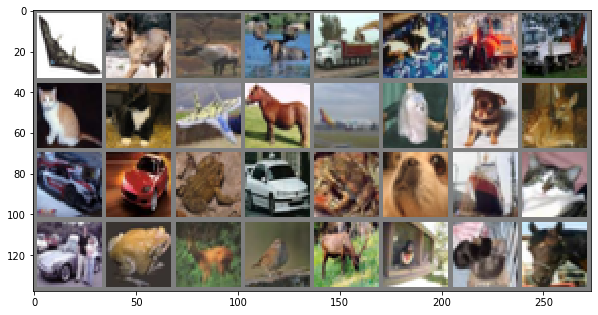

In [80]:
fileutils.get_image_samples(trainloader, classes)

In [6]:
model_new = basemodelclass.CIFARModelDepthDilate().to(device)
summary(model_new,input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]             288
            Conv2d-6           [-1, 32, 32, 32]           1,024
       BatchNorm2d-7           [-1, 32, 32, 32]              64
              ReLU-8           [-1, 32, 32, 32]               0
         MaxPool2d-9           [-1, 32, 16, 16]               0
          Dropout-10           [-1, 32, 16, 16]               0
           Conv2d-11           [-1, 64, 16, 16]          18,432
      BatchNorm2d-12           [-1, 64, 16, 16]             128
             ReLU-13           [-1, 64, 16, 16]               0
          Dropout-14           [-1, 64,

In [7]:
type(model_new)

RekogNizer.basemodelclass.CIFARModelDepthDilate

In [8]:
optimizer=optim.SGD#(model.parameters(), lr=0.001, momentum=0.9)
criterion=nn.CrossEntropyLoss
#model = basemodelclass.CIFARModelBuilder()#.to(device)
model_new = basemodelclass.CIFARModelDepthDilate#.to(device)
#execute_model(model, hyperparameter_defaults, )
execute_model(model_new, hyperparameter_defaults, 
              trainloader, testloader, 
              device, classes,
              optimizer=optimizer,
              criterion=criterion)

  0%|          | 0/391 [00:00<?, ?it/s]

Model saved to:  /content/drive/My Drive/EVA4/model_saves/model-11f0f918dc.h5
Hyper Params:
wandb_version: 1

_wandb:
  desc: null
  value:
    cli_version: 0.8.28
    is_jupyter_run: true
    python_version: 3.6.9
batch_size:
  desc: null
  value: 128
bias:
  desc: null
  value: false
dropout:
  desc: null
  value: 0.1
epochs:
  desc: null
  value: 15
lr:
  desc: null
  value: 0.001
momentum:
  desc: null
  value: 0.9
no_cuda:
  desc: null
  value: false
project:
  desc: null
  value: news4eva4
run_name:
  desc: null
  value: 11f0f918dc
sched_lr_gamma:
  desc: null
  value: 0.5
sched_lr_step:
  desc: null
  value: 1
seed:
  desc: null
  value: 1
start_lr:
  desc: null
  value: 0
test_batch_size:
  desc: null
  value: 128
weight_decay:
  desc: null
  value: 0.0



  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 1 Train set: Average loss: 0.0151, Accuracy: 28.940%
Epoch: 1 Test set: Average loss: 1.8127, Accuracy: 30.450%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 2 Train set: Average loss: 0.0118, Accuracy: 44.544%
Epoch: 2 Test set: Average loss: 1.8229, Accuracy: 34.340%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 3 Train set: Average loss: 0.0105, Accuracy: 50.368%
Epoch: 3 Test set: Average loss: 1.4499, Accuracy: 47.690%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 4 Train set: Average loss: 0.0097, Accuracy: 54.926%
Epoch: 4 Test set: Average loss: 1.3188, Accuracy: 53.250%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 5 Train set: Average loss: 0.0090, Accuracy: 58.606%
Epoch: 5 Test set: Average loss: 1.2319, Accuracy: 56.670%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 6 Train set: Average loss: 0.0084, Accuracy: 61.260%
Epoch: 6 Test set: Average loss: 1.0942, Accuracy: 61.100%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 7 Train set: Average loss: 0.0079, Accuracy: 64.048%
Epoch: 7 Test set: Average loss: 1.0820, Accuracy: 61.970%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 8 Train set: Average loss: 0.0074, Accuracy: 65.956%
Epoch: 8 Test set: Average loss: 1.0745, Accuracy: 62.610%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 9 Train set: Average loss: 0.0072, Accuracy: 67.306%
Epoch: 9 Test set: Average loss: 0.8937, Accuracy: 68.340%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 10 Train set: Average loss: 0.0068, Accuracy: 68.984%
Epoch: 10 Test set: Average loss: 0.8880, Accuracy: 69.020%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 11 Train set: Average loss: 0.0066, Accuracy: 69.978%
Epoch: 11 Test set: Average loss: 0.8174, Accuracy: 71.190%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 12 Train set: Average loss: 0.0064, Accuracy: 71.100%
Epoch: 12 Test set: Average loss: 0.8037, Accuracy: 71.700%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 13 Train set: Average loss: 0.0062, Accuracy: 71.838%
Epoch: 13 Test set: Average loss: 0.8340, Accuracy: 70.800%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 14 Train set: Average loss: 0.0060, Accuracy: 72.598%
Epoch: 14 Test set: Average loss: 0.8108, Accuracy: 71.790%


loss=1.0446099042892456 batch_id=390: 100%|██████████| 391/391 [00:16<00:00, 28.06it/s]



Epoch: 15 Train set: Average loss: 0.0059, Accuracy: 73.538%
Epoch: 15 Test set: Average loss: 0.7817, Accuracy: 73.050%
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-11f0f918dc.h5


In [9]:
execute_model(model_new, hyperparameter_defaults, 
              trainloader, testloader, 
              device, classes,
              optimizer=optimizer,
              criterion=criterion,
              prev_saved_model="/content/drive/My Drive/EVA4/model_saves/model-11f0f918dc.h5")

  0%|          | 0/391 [00:00<?, ?it/s]

Model saved to:  /content/drive/My Drive/EVA4/model_saves/model-33ef5baa01.h5
Hyper Params:
wandb_version: 1

_wandb:
  desc: null
  value:
    cli_version: 0.8.28
    is_jupyter_run: true
    python_version: 3.6.9
batch_size:
  desc: null
  value: 128
bias:
  desc: null
  value: false
dropout:
  desc: null
  value: 0.1
epochs:
  desc: null
  value: 15
lr:
  desc: null
  value: 0.001
momentum:
  desc: null
  value: 0.9
no_cuda:
  desc: null
  value: false
project:
  desc: null
  value: news4eva4
run_name:
  desc: null
  value: 33ef5baa01
sched_lr_gamma:
  desc: null
  value: 0.5
sched_lr_step:
  desc: null
  value: 1
seed:
  desc: null
  value: 1
start_lr:
  desc: null
  value: 0
test_batch_size:
  desc: null
  value: 128
weight_decay:
  desc: null
  value: 0.0



  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 1 Train set: Average loss: 0.0057, Accuracy: 74.126%
Epoch: 1 Test set: Average loss: 0.7307, Accuracy: 74.640%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 2 Train set: Average loss: 0.0055, Accuracy: 74.872%
Epoch: 2 Test set: Average loss: 0.7898, Accuracy: 72.710%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 3 Train set: Average loss: 0.0054, Accuracy: 75.328%
Epoch: 3 Test set: Average loss: 0.7005, Accuracy: 75.570%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 4 Train set: Average loss: 0.0053, Accuracy: 76.028%
Epoch: 4 Test set: Average loss: 0.7292, Accuracy: 74.920%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 5 Train set: Average loss: 0.0052, Accuracy: 76.412%
Epoch: 5 Test set: Average loss: 0.6932, Accuracy: 76.030%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 6 Train set: Average loss: 0.0051, Accuracy: 77.132%
Epoch: 6 Test set: Average loss: 0.7214, Accuracy: 74.860%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 7 Train set: Average loss: 0.0050, Accuracy: 77.482%
Epoch: 7 Test set: Average loss: 0.7392, Accuracy: 74.580%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 8 Train set: Average loss: 0.0049, Accuracy: 78.248%
Epoch: 8 Test set: Average loss: 0.6835, Accuracy: 76.120%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 9 Train set: Average loss: 0.0048, Accuracy: 78.382%
Epoch: 9 Test set: Average loss: 0.6431, Accuracy: 77.980%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 10 Train set: Average loss: 0.0047, Accuracy: 78.842%
Epoch: 10 Test set: Average loss: 0.6542, Accuracy: 77.880%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 11 Train set: Average loss: 0.0046, Accuracy: 79.342%
Epoch: 11 Test set: Average loss: 0.6446, Accuracy: 77.990%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 12 Train set: Average loss: 0.0045, Accuracy: 79.668%
Epoch: 12 Test set: Average loss: 0.6740, Accuracy: 77.220%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 13 Train set: Average loss: 0.0045, Accuracy: 80.066%
Epoch: 13 Test set: Average loss: 0.6646, Accuracy: 77.240%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 14 Train set: Average loss: 0.0044, Accuracy: 80.270%
Epoch: 14 Test set: Average loss: 0.6463, Accuracy: 78.100%


loss=0.7277581095695496 batch_id=390: 100%|██████████| 391/391 [00:17<00:00, 22.96it/s]



Epoch: 15 Train set: Average loss: 0.0043, Accuracy: 80.574%
Epoch: 15 Test set: Average loss: 0.6533, Accuracy: 78.090%
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-33ef5baa01.h5


In [10]:
execute_model(model_new, hyperparameter_defaults, 
              trainloader, testloader, 
              device, classes,
              optimizer=optimizer,
              criterion=criterion,
              prev_saved_model="/content/drive/My Drive/EVA4/model_saves/model-33ef5baa01.h5")

  0%|          | 0/391 [00:00<?, ?it/s]

Model saved to:  /content/drive/My Drive/EVA4/model_saves/model-2c0cd03c7a.h5
Hyper Params:
wandb_version: 1

_wandb:
  desc: null
  value:
    cli_version: 0.8.28
    is_jupyter_run: true
    python_version: 3.6.9
batch_size:
  desc: null
  value: 128
bias:
  desc: null
  value: false
dropout:
  desc: null
  value: 0.1
epochs:
  desc: null
  value: 15
lr:
  desc: null
  value: 0.001
momentum:
  desc: null
  value: 0.9
no_cuda:
  desc: null
  value: false
project:
  desc: null
  value: news4eva4
run_name:
  desc: null
  value: 2c0cd03c7a
sched_lr_gamma:
  desc: null
  value: 0.5
sched_lr_step:
  desc: null
  value: 1
seed:
  desc: null
  value: 1
start_lr:
  desc: null
  value: 0
test_batch_size:
  desc: null
  value: 128
weight_decay:
  desc: null
  value: 0.0



  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 1 Train set: Average loss: 0.0043, Accuracy: 80.814%
Epoch: 1 Test set: Average loss: 0.6058, Accuracy: 79.270%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 2 Train set: Average loss: 0.0042, Accuracy: 81.402%
Epoch: 2 Test set: Average loss: 0.6538, Accuracy: 78.100%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 3 Train set: Average loss: 0.0041, Accuracy: 81.560%
Epoch: 3 Test set: Average loss: 0.5935, Accuracy: 79.610%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 4 Train set: Average loss: 0.0041, Accuracy: 81.852%
Epoch: 4 Test set: Average loss: 0.6304, Accuracy: 78.850%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 5 Train set: Average loss: 0.0040, Accuracy: 81.936%
Epoch: 5 Test set: Average loss: 0.5913, Accuracy: 80.420%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 6 Train set: Average loss: 0.0039, Accuracy: 82.412%
Epoch: 6 Test set: Average loss: 0.6160, Accuracy: 79.360%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 7 Train set: Average loss: 0.0038, Accuracy: 82.636%
Epoch: 7 Test set: Average loss: 0.6309, Accuracy: 79.080%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 8 Train set: Average loss: 0.0038, Accuracy: 83.016%
Epoch: 8 Test set: Average loss: 0.6016, Accuracy: 79.430%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 9 Train set: Average loss: 0.0038, Accuracy: 83.006%
Epoch: 9 Test set: Average loss: 0.5934, Accuracy: 80.330%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 10 Train set: Average loss: 0.0037, Accuracy: 83.420%
Epoch: 10 Test set: Average loss: 0.5863, Accuracy: 80.610%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 11 Train set: Average loss: 0.0036, Accuracy: 83.694%
Epoch: 11 Test set: Average loss: 0.5762, Accuracy: 80.720%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 12 Train set: Average loss: 0.0036, Accuracy: 83.796%
Epoch: 12 Test set: Average loss: 0.6117, Accuracy: 79.970%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 13 Train set: Average loss: 0.0036, Accuracy: 84.004%
Epoch: 13 Test set: Average loss: 0.5818, Accuracy: 80.580%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 14 Train set: Average loss: 0.0035, Accuracy: 84.294%
Epoch: 14 Test set: Average loss: 0.6012, Accuracy: 80.220%


loss=0.5983806848526001 batch_id=390: 100%|██████████| 391/391 [00:16<00:00, 23.90it/s]



Epoch: 15 Train set: Average loss: 0.0035, Accuracy: 84.454%
Epoch: 15 Test set: Average loss: 0.6293, Accuracy: 79.660%
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-2c0cd03c7a.h5


In [0]:
%autoreload 2
from RekogNizer import logger
run_list = ["rajy4683/news4eva4/runs/h5cejeg2","rajy4683/news4eva4/runs/2zoz8lca", "rajy4683/news4eva4/runs/mi0limq7"]

runs_df = logger.get_wandb_dataframes(run_list=run_list)
new_df = pd.DataFrame().append(runs_df)

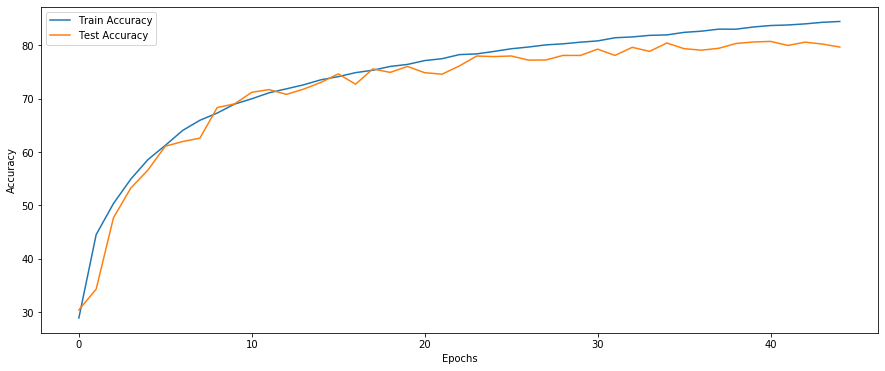

In [44]:
from RekogNizer import fileutils
fileutils.plot_graphs([new_df],
            ['Train Accuracy', 'Test Accuracy'],
            columns=['Train Accuracy', 'Test Accuracy'],
            xlabel="Epochs",
            ylabel="Accuracy")

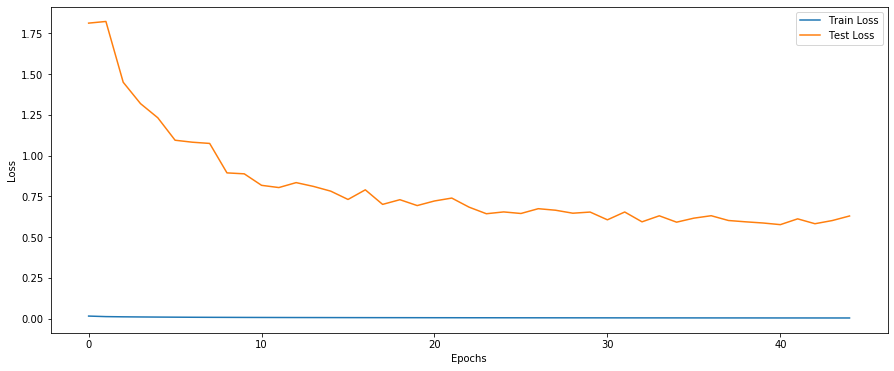

In [45]:
fileutils.plot_graphs([new_df],
            ['Train Loss', 'Test Loss'],
            columns=['Train Loss', 'Test Loss'],
            xlabel="Epochs",
            ylabel="Loss")

In [0]:
from RekogNizer import traintest


In [88]:
my_model = traintest.model_builder(basemodelclass.CIFARModelDepthDilate, weights_path="/content/drive/My Drive/EVA4/model_saves/model-2c0cd03c7a.h5")
class_accuracy_dict = traintest.classwise_accuracy(my_model, testloader, classes, device=torch.device("cpu"))

Accuracy of plane : 80 %
Accuracy of   car : 87 %
Accuracy of  bird : 67 %
Accuracy of   cat : 57 %
Accuracy of  deer : 70 %
Accuracy of   dog : 68 %
Accuracy of  frog : 82 %
Accuracy of horse : 81 %
Accuracy of  ship : 86 %
Accuracy of truck : 85 %


<BarContainer object of 10 artists>

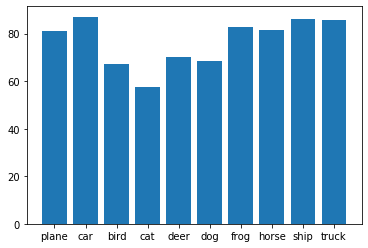

In [89]:
plt.bar([key for key in class_accuracy_dict.keys()],[val for val in class_accuracy_dict.values()])